In [2]:
import pandas as pd 
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## 1.Basic Overview ✅

In [3]:
def basic_overview(df):
    """
    Display a basic overview of the DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    None
    """
    print("1. Basic Overview")

    # Trim whitespace and convert categorical values to lowercase
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df[column] = df[column].str.strip().str.lower()

    # Display the number of rows and columns
    num_rows, num_cols = df.shape
    print("Number of rows:", num_rows)
    print("Number of columns:", num_cols)

    # Display basic statistics for numerical columns
    numerical_stats = df.describe().round(3)  # Round numerical statistics to 3 decimal places
    print("\nBasic statistics for numerical columns:")
    print(numerical_stats.to_string(float_format='{:,.3f}'.format))

    # Display unique values for categorical columns
    print("\nBasic Statistics for categorical columns")
    for column in categorical_columns:
        unique_values = df[column].unique()
        num_unique_values = len(unique_values)
        if num_unique_values > 10:
            print(f"\nUnique values for '{column}' (first 10 values):")
            print(unique_values[:10])
            print("...")
        else:
            print(f"\nUnique values for '{column}':")
            print(unique_values)

## 2. Data type and Missing Values✅

In [4]:
def data_type_and_missing_values(df):
    print("\n2. Data type and Missing Values")
    # Display the data type of each column
    data_types = df.dtypes
    print("\nData type of each column:")
    for column, dtype in data_types.items():
        print(f"{column}: {dtype}")
    print("\nMissing Values :")
    # Calculate and display the number of missing values for each column
    missing_values_count = df.isnull().sum()

    # Optionally, calculate and display the percentage of missing values for each column
    total_values = df.shape[0]
    missing_values_percentage = (missing_values_count / total_values) * 100

    # Display missing values count and percentage for each column
    for column in missing_values_count.index:
        missing_count = missing_values_count[column]
        percentage = missing_values_percentage[column]
        if missing_count == 0:
            print(f"{column}: {missing_count} missing values")
        else:
            print(f"{column}: {missing_count} missing values, equals to {percentage:.2f}% of the dataset")

## 3. Data Quality Checks ✅

In [5]:
def character_length_comparison(df):
    print("\nCharacter Length Comparison:")
    for column in df.select_dtypes(include=['object']).columns:
        value_lengths = df[column].astype(str).apply(len)
        length_percentage = (value_lengths.value_counts(normalize=True) * 100).round(2)
        
        print(f"Column: {column}")
        unique_lengths = value_lengths.unique()
        num_lengths = len(unique_lengths)
        if num_lengths > 20:
            top_lengths = length_percentage.head(5)  # Get top 5 lengths
            bottom_lengths = length_percentage.tail(5)  # Get bottom 5 lengths
            print(", ".join([f"Character count {length}: {percentage}%" for length, percentage in top_lengths.items()]))
            print("...")
            print(", ".join([f"Character count {length}: {percentage}%" for length, percentage in bottom_lengths.items()]))
        else:
            for length, percentage in length_percentage.items():
                print(f"Character count {length}: {percentage}%")
def check_duplicate_rows(df):
    print("\nDuplicate rows:")
    duplicate_rows = df[df.duplicated()]
    num_duplicates = len(duplicate_rows)
    if num_duplicates == 0:
        print("No duplicate rows found")
    else:
        print(f"{num_duplicates} duplicate rows found")
        print(duplicate_rows)

### Plot all the boxplot of every column

In [6]:
def plot_boxplots(df):
    """
    Plot boxplots for each numerical column in the DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    None
    """
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Plot boxplots for each numerical column
    for column in numerical_columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot for {column}")
        plt.xlabel(column)
        plt.show()

## 4. Column Specific Insights

 For columns with a limited number of unique values (20), display the distribution of those values.

In [7]:
def column_specific_insights(df):
    print("\nColumn Specific Insights:")
    for column in df.columns:
        unique_values = df[column].nunique()
        if unique_values <= 20:
            print(f"\nDistribution of values for column '{column}':")
            value_counts = df[column].value_counts()
            total_count = value_counts.sum()
            for value, count in value_counts.items():
                percentage = (count / total_count) * 100
                print(f"{value}: {count} ({percentage:.2f}%)")
            
            # Plot histogram
            plt.figure(figsize=(6,4))
            df[column].hist()
            plt.title(f"Histogram of {column}")
            plt.xlabel(column)
            plt.ylabel("Frequency")
            plt.show()
        else:
            print(f"\nColumn '{column}' needs grouping (binning) due to more than 20 unique values.")


analyzing date/times data type 

In [8]:
def analyze_datetime_columns(df):
    datetime_columns = df.select_dtypes(include=['datetime64']).columns
    
    if len(datetime_columns) == 0:
        print("No datetime data type found in the dataset.")
        return
    
    for column in datetime_columns:
        print(f"Analysis for datetime column '{column}':")
        
        # Display range of dates
        min_date = df[column].min()
        max_date = df[column].max()
        print(f"Range of dates: {min_date} to {max_date}")
        
        # Check if datetime column can be aggregated
        if df[column].dt.date.nunique() > 1:  # Check if there are multiple dates
            # Extract useful insights (e.g., busiest days)
            busiest_days = df[column].dt.day_name().value_counts().head(5)
            print("\nInsights:")
            print("Busiest days:")
            print(busiest_days)
            
            # Visualize insights
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=df[column].dt.day_name(), order=busiest_days.index)
            plt.title(f"Busiest Days for {column}")
            plt.xlabel("Day of the Week")
            plt.ylabel("Frequency")
            plt.xticks(rotation=45)
            plt.show()
        else:
            print("Datetime column cannot be aggregated for insights.")
        print("----------------------------------------")

## 5. Correlation Analysis 

In [9]:
def correlation_analysis(df):
    # Numerical columns correlation heatmap
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    numerical_corr = df[numerical_columns].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap for Numerical Columns")
    plt.show()
    
    # Categorical columns correlation heatmap (including numerical columns after label encoding)
    categorical_columns = df.select_dtypes(include=['object']).columns
    if len(categorical_columns) > 0:
        label_encoder = LabelEncoder()
        df_encoded = df.copy()
        for col in categorical_columns:
            df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
        combined_corr = df_encoded.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(combined_corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Heatmap for Numerical and Label-Encoded Categorical Columns")
        plt.show()
    else:
        print("No categorical columns found for correlation analysis.")

# Choose the dataset

In [11]:
# Load the dataset
file_path = r"C:\Data Analytics\Data_for_learning_overall\data_machine_learning\titanic survive rate\titanic.csv"
df = pd.read_csv(file_path)

## Glance at the dataset 

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,NaN,s
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c85,c
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,NaN,s
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,c123,s
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,s
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"montvila, rev. juozas",male,27.0,0,0,211536,13.0000,NaN,s
887,888,1,1,"graham, miss. margaret edith",female,19.0,0,0,112053,30.0000,b42,s
888,889,0,3,"johnston, miss. catherine helen ""carrie""",female,NaN,1,2,w./c. 6607,23.4500,NaN,s
889,890,1,1,"behr, mr. karl howell",male,26.0,0,0,111369,30.0000,c148,c


## Final Report

1. Basic Overview
Number of rows: 891
Number of columns: 12

Basic statistics for numerical columns:
       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count      891.000   891.000 891.000 714.000 891.000 891.000 891.000
mean       446.000     0.384   2.309  29.699   0.523   0.382  32.204
std        257.354     0.487   0.836  14.526   1.103   0.806  49.693
min          1.000     0.000   1.000   0.420   0.000   0.000   0.000
25%        223.500     0.000   2.000  20.125   0.000   0.000   7.910
50%        446.000     0.000   3.000  28.000   0.000   0.000  14.454
75%        668.500     1.000   3.000  38.000   1.000   0.000  31.000
max        891.000     1.000   3.000  80.000   8.000   6.000 512.329

Basic Statistics for categorical columns

Unique values for 'Name' (first 10 values):
['braund, mr. owen harris'
 'cumings, mrs. john bradley (florence briggs thayer)'
 'heikkinen, miss. laina' 'futrelle, mrs. jacques heath (lily may peel)'
 'allen, mr. william henry' 'moran, 

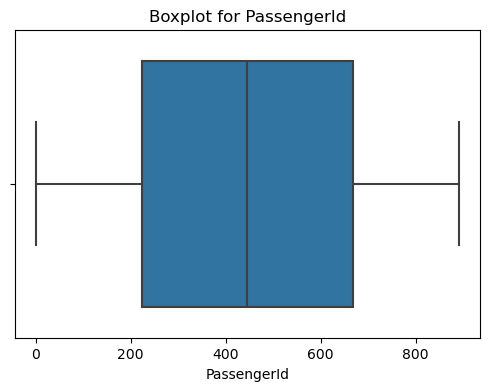

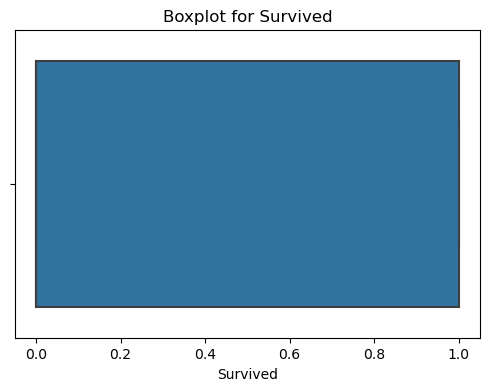

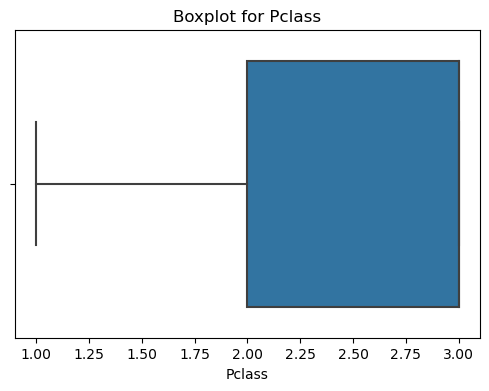

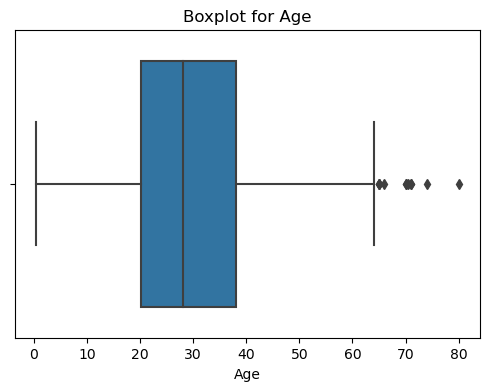

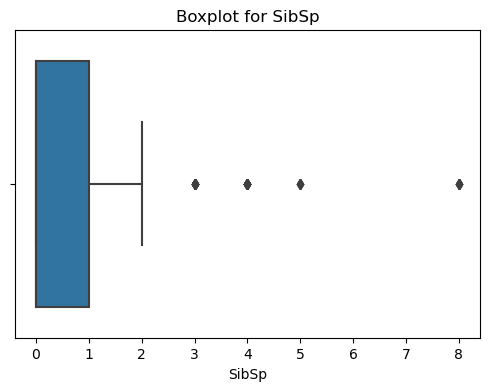

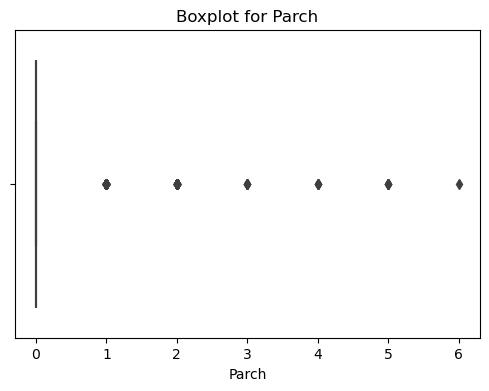

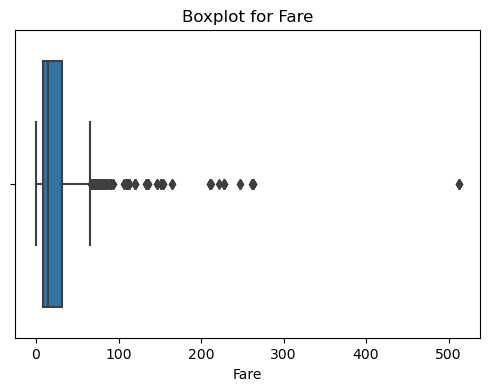

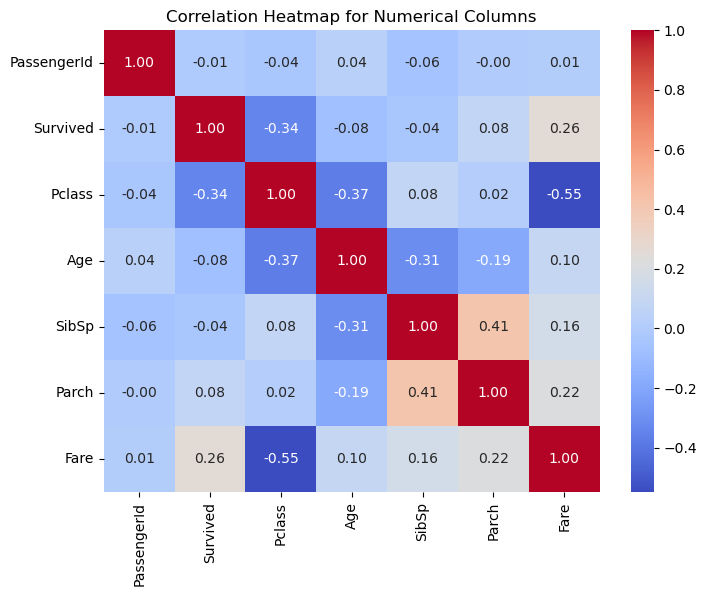

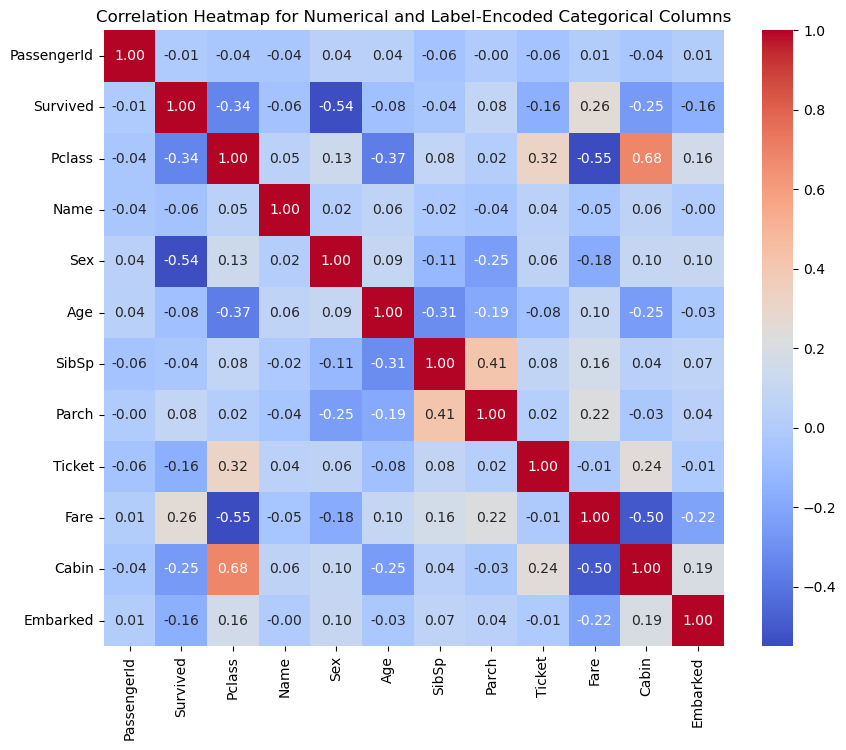

In [12]:
def data_roll_pipeline(df):
    basic_overview(df)
    data_type_and_missing_values(df)
    character_length_comparison(df)
    check_duplicate_rows(df)
    analyze_datetime_columns(df)
    plot_boxplots(df)
    correlation_analysis(df)
data_roll_pipeline(df)
